# Weather Type Prediction Using Machine Learning (All-in-One Notebook)


## Overview
This notebook demonstrates how to classify weather types (Rainy, Sunny, Cloudy, Snowy) based on weather-related features using Support Vector Machine . The steps include:
- Data preprocessing
- Exploratory data analysis
- Model training with different SVM kernels and evaluation.


## Dataset :
- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).

Dataset credits: Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

**Import  Libraries**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

## Load Dataset


In [25]:

df = pd.read_csv("weather_classification_data.csv")
print(f"rows : {df.shape[1]}   columns : {df.shape[0]}")
df.head()

rows : 11   columns : 13200


,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [26]:
print("missing values :")
print(df.isna().sum())

missing values :
temperature             0
humidity                0
wind_speed              0
precipitation (%)       0
cloud_cover             0
atmospheric_pressure    0
uv_index                0
season                  0
visibility (km)         0
location                0
weather_type            0
dtype: int64


In [27]:
df.describe()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


## Visualize the distribution of key features

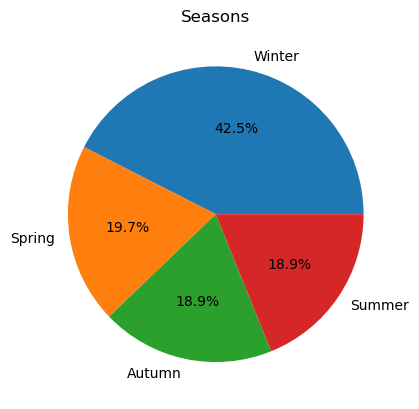

In [28]:
season_counts = df.season.value_counts()
plt.pie(season_counts.values , labels = season_counts.index , autopct='%1.1f%%')
plt.title("Seasons")
plt.show()

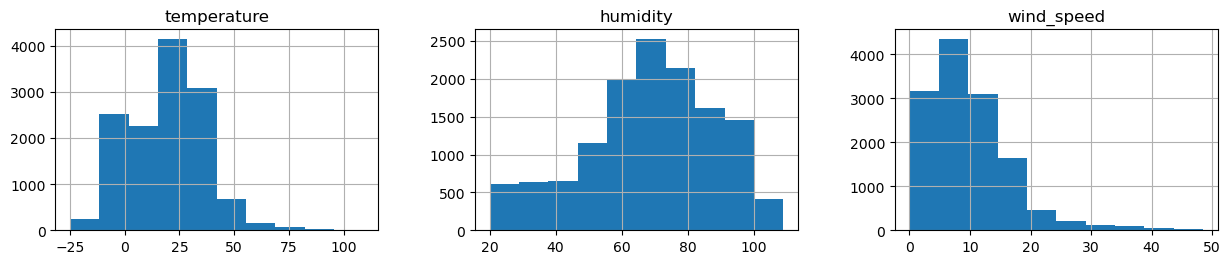

In [29]:
df[['temperature', 'humidity', 'wind_speed' ]].hist(bins=10, figsize=(15, 6), layout=(2, 3))
plt.show()


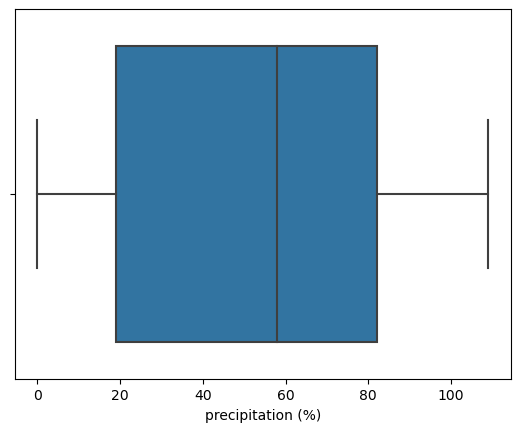

In [30]:
sns.boxplot(x = "precipitation (%)" , data = df)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


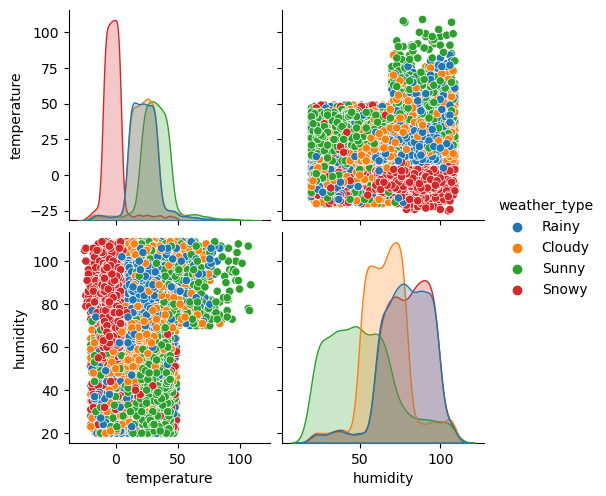

In [31]:
sns.pairplot(df[["temperature" ,'humidity',"weather_type"]], hue="weather_type")
plt.show()

## Data Preprocessing


### 1. Encode Categorical variables

In [32]:
df = pd.get_dummies(df, columns =["cloud_cover", "location","season"] , drop_first = True )
df.sample(5)

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
12781,32,96,8.0,62,1018.06,3,2.5,Rainy,False,False,True,False,False,True,False,False
12018,33,67,7.0,58,992.10,1,3.5,Rainy,False,False,True,True,False,False,True,False
2718,-6,72,2.5,60,991.71,1,4.5,Snowy,False,True,False,False,True,False,False,True
6297,-4,94,9.5,55,989.77,0,3.0,Snowy,False,True,False,False,True,False,False,True
8610,27,75,2.0,21,1003.88,2,7.5,Cloudy,False,True,False,True,False,True,False,False


### 2. Scale Numeric features

In [33]:
scaler = StandardScaler()

numerical_features = ['temperature' , 'humidity' , 'wind_speed' , 'precipitation (%)', 'atmospheric_pressure', 'uv_index', 'visibility (km)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,Rainy,False,False,True,True,False,False,False,True
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,Cloudy,False,False,True,True,False,True,False,False
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,Sunny,False,False,False,False,True,True,False,False
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,Sunny,False,False,False,False,False,True,False,False
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,Rainy,False,True,False,False,True,False,False,True


## Model Training Using SVM 


In [34]:
# Select features and target variable
X = df.drop('weather_type', axis=1)
y = df['weather_type']

# Split the data
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42)

### Linear kernel

In [43]:
# Train SVM with linear kernel

model = SVC(kernel = "linear")
model.fit(X_train, y_train)
# Step 4: Print accuracy score
y_pred = model.predict(X_test)

print(f"Linear Kernel SVM Accuracy on Test Data: {accuracy_score(y_test , y_pred)}")
print('*' * 50)

# Evaluate the model

#classification report
report = classification_report(y_test , y_pred)
print("Classification Report for Linear Kernel SVM:")
print(report)
print('*' * 50)


#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Linear Kernel SVM:")
print(cm)


Linear Kernel SVM Accuracy on Test Data: 0.884090909090909
**************************************************
Classification Report for Linear Kernel SVM:
              precision    recall  f1-score   support

      Cloudy       0.86      0.85      0.86       651
       Rainy       0.87      0.86      0.86       647
       Snowy       0.89      0.95      0.92       701
       Sunny       0.91      0.88      0.89       641

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640

**************************************************
Confusion Matrix for Linear Kernel SVM:
[[552  55  15  29]
 [ 32 557  45  13]
 [ 18   6 663  14]
 [ 37  24  18 562]]


### RBF kernel

In [44]:
#Train SVM with RBF kernel

model = SVC(kernel = 'rbf')
model.fit(X_train , y_train)
y_pred = model.predict(X_test)


print(f"RBF Kernel SVM Accuracy score : { accuracy_score(y_test , y_pred)}")
print('*' * 50)

#Evaluate the model

#classification report

report = classification_report(y_test, y_pred)
print("Classification report for RBF kernel SVM : ")
print(report)

print('*' * 50)

#confusion matrix
print("Confusion Matrix for RBF Kernel SVM:")
print(confusion_matrix(y_test , y_pred))

RBF Kernel SVM Accuracy score : 0.9094696969696969
**************************************************
Classification report for RBF kernel SVM : 
              precision    recall  f1-score   support

      Cloudy       0.87      0.90      0.88       651
       Rainy       0.90      0.90      0.90       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.92      0.89      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

**************************************************
Confusion Matrix for RBF Kernel SVM:
[[587  36  12  16]
 [ 37 584   9  17]
 [ 17  13 657  14]
 [ 35  13  20 573]]


### Experiment with Hyperparameters in SVM


In [48]:
#Train the SVM model with specified hyperparameters

model = SVC(C = 0.5 , gamma = 'auto' , kernel = 'rbf' , degree = 5)
model.fit(X_train , y_train)

y_pred = model.predict(X_test)
print(f"Custom model accuracy score : {accuracy_score(y_test , y_pred)}")

print('*' * 50)


# Evaluate the model 

#classification report

print("Classification Report for Custom SVM Model:")
print(classification_report(y_test , y_pred))

print('*' * 50)

#confusion matrix
print("Confusion Matrix for Custom SVM Model:")
print(confusion_matrix(y_test , y_pred))

Custom model accuracy score : 0.9003787878787879
**************************************************
Classification Report for Custom SVM Model:
              precision    recall  f1-score   support

      Cloudy       0.86      0.88      0.87       651
       Rainy       0.89      0.90      0.90       647
       Snowy       0.93      0.93      0.93       701
       Sunny       0.91      0.88      0.90       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

**************************************************
Confusion Matrix for Custom SVM Model:
[[573  41  14  23]
 [ 33 585  14  15]
 [ 21   9 655  16]
 [ 38  19  20 564]]


## Conclusion
- The svm with RBF kernel performed best with 0.909% accuracy